In [2]:
#Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.interpolate

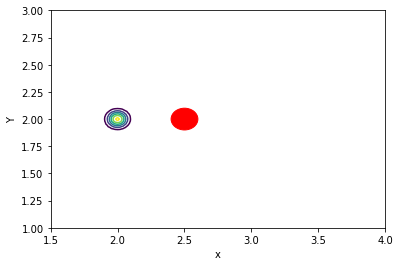

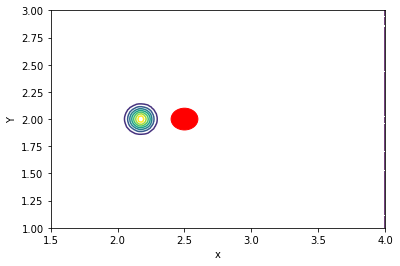

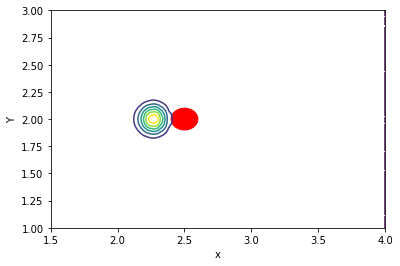

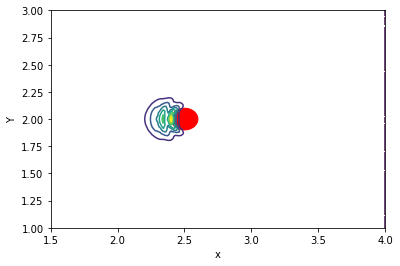

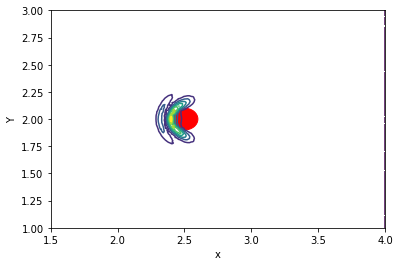

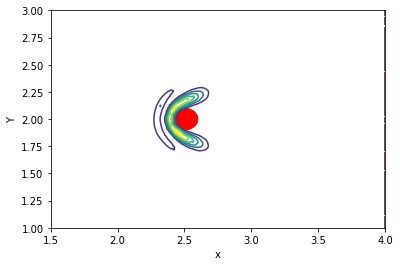

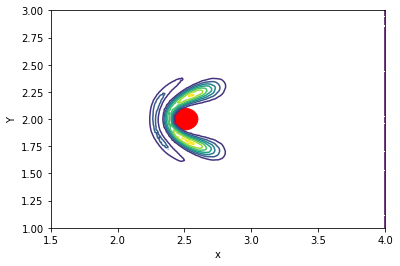

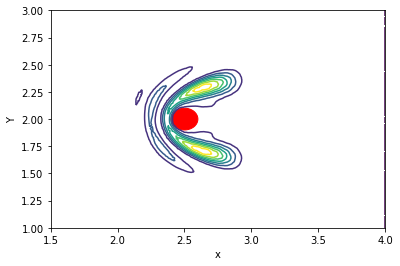

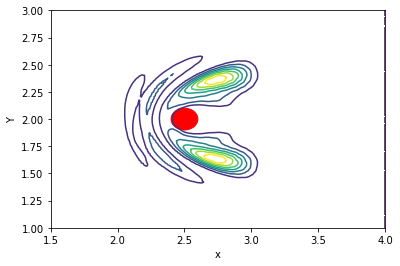

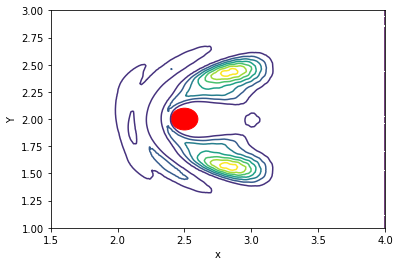

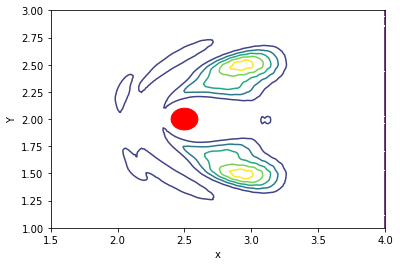

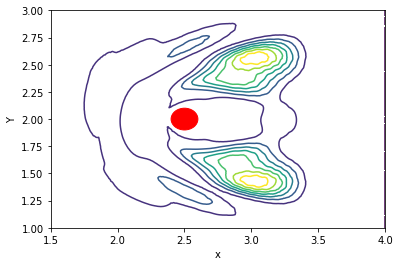

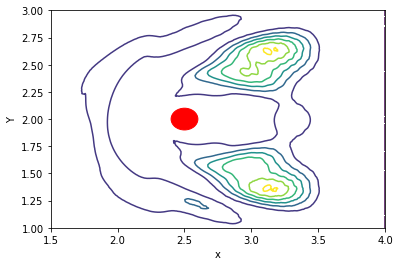

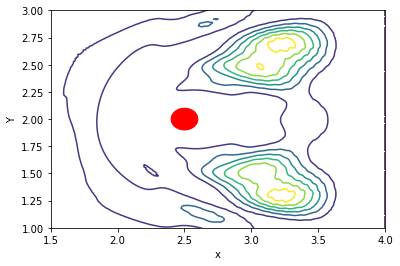

In [20]:
#If one would like to plot other cases, simply change the "tun" to the corresponding name 
#i.e. "tun" -> "pw" for potential wall in all of the paths and the savefig
#Importing the csv file for t=0
na = open('/Users/kevinkwok/Documents/NM_project/2D/0tun_2dleap.csv')
csv_na = csv.reader(na)
x_vn=[]
y_vn=[]
mag=[]
for column in csv_na:
    x_vn.append(float(column[0]))
    y_vn.append(float(column[1]))
    mag.append(float(column[4]))
x_vn=np.array(x_vn)
y_vn=np.array(y_vn)
mag=np.array(mag)

#setting up the grid where N is the number of points on each direction
N = 2000
xi = np.linspace(x_vn.min(), x_vn.max(), N)
yi = np.linspace(y_vn.min(), y_vn.max(), N)

#Importing the other csv files up to the desired time
for i in range(0,14):
    nb = open('/Users/kevinkwok/Documents/NM_project/2D/'+str(50*i)+'tun_2dleap.csv')
    csv_nb = csv.reader(nb)
    nmag=[]
    for column in csv_nb:
        nmag.append(float(column[4]))
    nmag=np.array(nmag)
    #Interpolate the magnitudes to assign a value for each coordinate pair (x,y)
    zi = scipy.interpolate.griddata((x_vn, y_vn), nmag, (xi[None,:], yi[:,None]), method='linear')
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    plt.xlim([1.5,4])
    plt.ylim([1,3])
    plt.xlabel('x')
    plt.ylabel('Y')
    #Contour plotting the interpolated result
    plt.contour(xi, yi, zi,label = 't = dt*'+str(50*i))
    circle1=plt.Circle((2.5, 2), 0.1,color='r')
    axes.add_artist(circle1)
    plt.savefig(str(50*i)+'tun_2dleap.png')

plt.show()

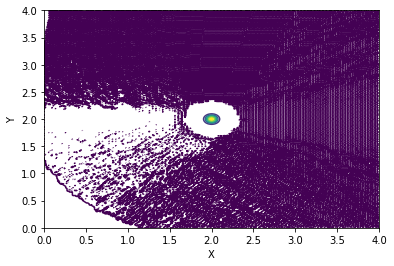

In [20]:

N = 500 #number of points for plotting/interpolation

#x, y, z = np.genfromtxt(r'dataa.txt', unpack=True)

xi = np.linspace(x_vn.min(), x_vn.max(), N)
yi = np.linspace(y_vn.min(), y_vn.max(), N)
zi = scipy.interpolate.griddata((x_vn, y_vn), mag, (xi[None,:], yi[:,None]), method='cubic')

fig = plt.figure()
plt.contour(xi, yi, zi)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

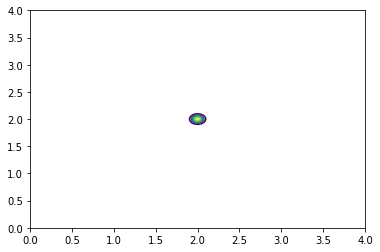

In [16]:

# Set up a regular grid of interpolation points
xj, yj = np.linspace(x_vn.min(), x_vn.max(), 500), np.linspace(y_vn.min(), y_vn.max(), 500)
xj, yj = np.meshgrid(xj, yj)

# Interpolate; there's also method='cubic' for 2-D data such as here
zj = scipy.interpolate.griddata((x_vn, y_vn), mag, (xj, yj), method='linear')

fig = plt.figure()
plt.contour(xj, yj, zj)
plt.show()

In [21]:
x2=[]
y2=[]
z2=[]
for i in range(0,len(xi)):
    for j in range(0,len(yi)):
        if zi[i][j]>10**(-10):
            x2.append(xi[j])
            y2.append(yi[i])
            z2.append(zi[i][j])
x2=np.array(x2)
y2=np.array(y2)
z2=np.array(z2)



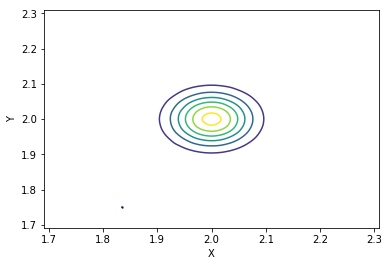

In [23]:
x = np.linspace(x2.min(), x2.max(), 500)
y = np.linspace(y2.min(), y2.max(), 500)
z = scipy.interpolate.griddata((x2, y2), z2, (x[None,:], y[:,None]), method='cubic')
fig = plt.figure()
plt.contour(x, y, z)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
circle1 = plt.Circle((2.5, 2), 0.1, color='r')


295047